In [2]:
#https://thisdata.com/blog/unsupervised-machine-learning-with-one-class-support-vector-machines/

import sys
sys.path.insert(0, r'/home/fabris/Documents/Trabajo/Doctorado/pycharm_DynCode/')
#sys.path

import DataAnalysis
from DataAnalysis import TimeSerieDC
from DataAnalysis import statistics
import numpy as np


from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics  


/home/fabris/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:

data_folder = '/home/fabris/Documents/Trabajo/Doctorado/Dyncode/low_res_datasets/2018_E1_28/Data_Analysis/Sin_final_tracks/Quantifiers/ML/OneClass/'
save_folder = '/home/fabris/Documents/Trabajo/Doctorado/Dyncode/low_res_datasets/2018_E1_28/Data_Analysis/Sin_final_tracks/Quantifiers/ML/OneClass/'
dataset_name='2018_E1_28'

conc = TimeSerieDC.TimeSerieDC(data_folder,dataset_name,save_folder)
conc_order = ['an_0ng','an_2_5ng','an_5ng','an_10ng','an_20ng','an_WT_ESL','an_WT_N2chHep']
conc.def_conc_order(conc_order)

ylim = [24962,63899] ; var_th = 700 ; var_ylim = [649,5904] 

conc.set_plot_values(ylim = ylim, var_th = var_th, var_ylim = var_ylim,long_plot = 2,cols_plot=7)


# =============================================================================
# Min Polynomial Detrend
# =============================================================================

filtmin_conc = TimeSerieDC.MinDT_TimeSerieDC(data_folder,dataset_name,save_folder)
filtmin_conc.def_conc_order(conc_order)
filtmin_conc.set_plot_values(ylim = ylim, var_th = var_th, var_ylim = var_ylim,long_plot = 2,cols_plot=7)

orders_min = [2] 
delta = 3
filtmin_conc.min_detrend(orders_min,delta,False)
filter_value = 2
filtmin_conc.set_filter_value(filter_value)
ylim = [-4000,4000]
filtmin_conc.set_plot_values(ylim=ylim)

# =============================================================================
# #Butter_Filter detrend
# =============================================================================

buterfilt_conc = TimeSerieDC.BFiltDT_TimeSerieDC(data_folder,dataset_name,save_folder)

buterfilt_conc.def_conc_order(conc_order)
buterfilt_conc.bfilt_detrend(0.025,0.6)
ylim = [-4000,4000] 
buterfilt_conc.set_plot_values(ylim=ylim,long_plot = 2,cols_plot=7)



NotADirectoryError: [Errno 20] Not a directory: '/home/fabris/Documents/Trabajo/Doctorado/Dyncode/low_res_datasets/2018_E1_28/Data_Analysis/Sin_final_tracks/Quantifiers/ML/OneClass/sc_data.csv'

In [ ]:
values = [conc,filtmin_conc,buterfilt_conc]
conc.traze_value = 'MEAN_INTENSITY'
for value in values:
    value.set_local_quantifiers(30,1)


## Feature extraction & normalization

In [29]:
# subset containing only the relevant features

aux_conc = conc.data['an_0ng'][['MEAN_INTENSITY','MEAN_INTENSITY_LOCAL_VAR', 'MEAN_INTENSITY_PE','MEAN_INTENSITY_F']]

aux_fm   = filtmin_conc.data['an_0ng'][['DT_MEAN_INTENSITY','DT_MEAN_INTENSITY_LOCAL_VAR', 'DT_MEAN_INTENSITY_PE',
      'DT_MEAN_INTENSITY_F']]
aux_bpf  = buterfilt_conc.data['an_0ng'][['MEAN_INTENSITY_BP','MEAN_INTENSITY_BP_LOCAL_VAR','MEAN_INTENSITY_BP_PE',
       'MEAN_INTENSITY_BP_F']]

data = pd.concat([aux_conc, aux_fm, aux_bpf], axis=1, sort=False)
data.reset_index(drop=True,inplace=True)

# normalise the data - this leads to better accuracy and reduces numerical instability in
# the SVM implementation

min_max_scaler = preprocessing.MinMaxScaler()
sc_data = pd.DataFrame(min_max_scaler.fit_transform(data))

/home/Fiore/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


One-class SVMs are a special case of support vector machine. First, data is modelled and the algorithm is trained. Then when new data are encountered their position relative to the "normal" data (or inliers) from training can be used to determine whether it is "out of class" or not - in other words, whether it is unusual or not. Because they can be trained with unlabelled data they are an example of unsupervised machine learning.
VISUALISING THE DATA
EXTRACTING AND NORMALIZING FEATURES

SVM implementations work better with normalised data. This yields both better accuracy and reduces numerical instability that is inherent in their implementation.



In [39]:
# we're using a one-class SVM, so we need.. a single class. the dataset 'label'
# check the shape for sanity checking.
sc_data.shape
data.to_pickle("./data.pkl")
sc_data.to_pickle("./sc_data.pkl")
data.to_csv("./data.csv")
sc_data.to_csv("./sc_data.csv")

## Modelos 1: One Class SVM

In [624]:
sc_data = pd.read_pickle("./sc_data.pkl")
data= pd.read_pickle("./data.pkl")


In [633]:
#ID = np.array(data.index); data['ID'] = ID ; data['label']=pd.DataFrame(np.ones(sc_data.shape[0]),index=ID)
#data.head()

#sc_data['ID'] = ID; sc_data['label']=pd.DataFrame(np.ones(sc_data.shape[0]),index=ID);sc_data.head()
#main_prueba.MEAN_INTENSITY_BP.plot()
#plt.plot(prueba.isna().any(axis='columns')*1,'o')
#y = prueba.isna().any(axis='columns')*-1+1
filtmin_conc.data['an_0ng'].to_pickle("./an_0ng_data.pkl")
filtmin_conc.data['an_WT_ESL'].to_pickle("./an_WT_ESL_data.pkl")

In [603]:
#Después hay que ver qué hacemos con los NANS, pero la idea es dropearlos solo de manera porhaora

print(sc_data.shape)
print(sc_data.dropna().shape)
sc_data.dropna(inplace=True)
print(sc_data.shape)


print(data.shape)
print(data.dropna().shape)
n_data = data.dropna(inplace=False)
print(n_data.shape)

(12778, 12)
(11473, 12)
(11473, 12)
(12778, 12)
(11473, 12)
(11473, 12)


In [604]:
sc_data.head()
n_data.head()
#pd.DataFrame(np.ones(sc_data.shape[0]),index=ID)#sc_data.label

,MEAN_INTENSITY,MEAN_INTENSITY_LOCAL_VAR,MEAN_INTENSITY_PE,MEAN_INTENSITY_F,DT_MEAN_INTENSITY,DT_MEAN_INTENSITY_LOCAL_VAR,DT_MEAN_INTENSITY_PE,DT_MEAN_INTENSITY_F,MEAN_INTENSITY_BP,MEAN_INTENSITY_BP_LOCAL_VAR,MEAN_INTENSITY_BP_PE,MEAN_INTENSITY_BP_F
15,43413.0328,504711.867434,0.095805,0.127459,-668.916202,1.407739e+06,0.095805,0.127459,-160.887992,475107.025375,0.102221,0.108585
16,42976.5574,500358.229974,0.145677,0.352307,-812.798185,1.472356e+06,0.079982,0.132957,-154.818109,480881.974653,0.111792,0.106361
17,43208.2623,554837.021043,0.142819,0.351546,-291.637051,1.461666e+06,0.050392,0.0589726,-372.106244,501539.184168,0.135566,0.149029
18,42804.5738,546945.656546,0.169072,0.362126,-418.199904,1.483146e+06,0.050392,0.0589726,-461.167076,502955.106936,0.152769,0.189827
19,43137.3607,542030.776459,0.169072,0.362126,171.724491,1.506151e+06,0.050392,0.0589726,-178.949742,501053.782360,0.152769,0.189827


In [605]:
label = pd.DataFrame(np.ones(n_data.shape[0]))

X_train, X_test, y_train, y_test = train_test_split(
    n_data, label, test_size = 0.20, random_state = 0) #stratify?

nu is "An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors" and must be between 0 and 1. Basically this means the proportion of outliers we expect in our data. This is an important factor to consider when assessing algorithms. Many unsupervised ML algorithms require you to know (or hint at) the number of outliers or class members you expect.

kernel is the kernel type to be used. Earlier we discussed SVM's ability to use a non-linear function to project the hyperspace to higher dimension. Setting kernel to something other than linear here will achieve that. The default is rbf (RBF - radial basis function).

gamma is a parameter of the RBF kernel type and controls the influence of individual training samples - this effects the "smoothness" of the model. A low value improves the smoothness and "generalizability" of the model, while a high value reduces it but makes the model "tighter-fitted" to the training data. Some experimentation is often required to find the best value.


In [606]:
X_train.head();

In [607]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = pd.DataFrame(min_max_scaler.fit_transform(X_train))

gamma = 'scale'
nu = 0.0005
kernel="rbf" #poly
clf = svm.OneClassSVM(kernel=kernel,nu=nu,gamma=gamma)


/home/Fiore/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [608]:
nus = [0.001, 0.01, 0.1, 1]
gammas = [0.001, 0.01, 0.1, 1]
tuned_parameters = {'kernel' : ['rbf'], 'gamma' : gammas, 'nu': nus}

In [609]:
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(min_max_scaler.transform(X_test))


In [610]:
#plt.plot(y_pred_train,'o',markersize = 0.1)

In [611]:
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train))  
print("precision: ", metrics.precision_score(y_train, y_pred_train))  
print("recall: ", metrics.recall_score(y_train, y_pred_train))  
print("f1: ", metrics.f1_score(y_train, y_pred_train))  
#print("area under curve (auc): ", metrics.roc_auc_score(y_train, y_pred_train))  

accuracy:  0.9995641752015689
precision:  1.0
recall:  0.9995641752015689
f1:  0.9997820401046207


In [612]:
preds = y_pred_test
targs = y_test

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
#print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

accuracy:  0.9995642701525055
precision:  1.0
recall:  0.9995642701525055
f1:  0.9997820876007845


In [613]:
#plt.plot(X_train[0],'o',markersize = 0.1)
#plt.plot(y_pred_train,'o',markersize = 0.1)

In [614]:
#prediction = pd.DataFrame(y_pred_train,index=X_train.index)
prediction = pd.DataFrame(y_pred_test,index=X_test.index)

In [615]:
prueba = pd.concat([data.MEAN_INTENSITY_BP, prediction], axis=1, sort=False)
prueba.columns = columns = ['MEAN_INTENSITY_BP','pred']
prueba.set_index(filtmin_conc.data['an_0ng'].index,inplace=True)
prueba.sort_index(inplace=True)


In [616]:
prueba;

In [617]:
#plt.plot(prueba.MEAN_INTENSITY_BP)
#plt.plot(prueba.pred,'o')

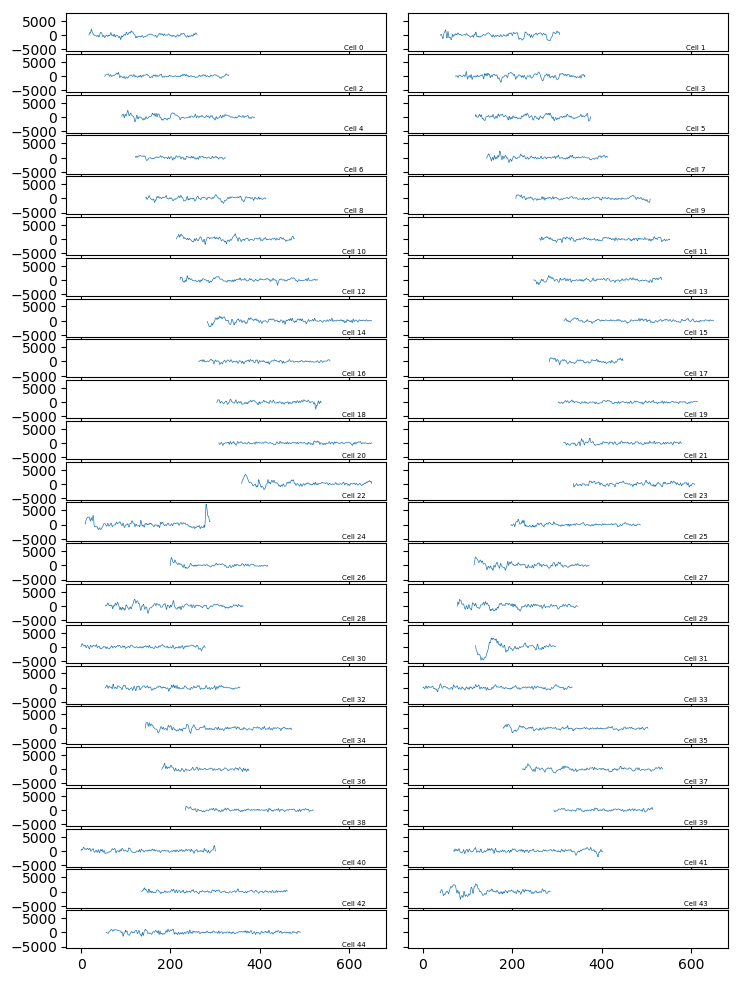

In [618]:
plt.rcdefaults()
df = prueba
cells = df.index.get_level_values(0).unique()
cols = 2
Tot = np.sum(len(cells));Cols = cols;Rows = Tot // Cols;
if Tot % Cols != 0:Rows = Rows + 1
fig, axs = plt.subplots(Rows, Cols, sharex=True, sharey=True, figsize=(8.27, 11.69))
axs = axs.ravel()


for z,cell in enumerate(cells):
    ax = axs[z];
    ax.grid(False);

    if cells[-1] >= cell:
        ax.plot(df.loc[cells[cell]]['MEAN_INTENSITY_BP'], linewidth=0.5)
        ax.fill_between(df.loc[cells[cell]].index, 5000,-5000, where=df.loc[cells[cell]]['pred']==-1, facecolor='yellow', alpha=0.5)
        ax.text(0.9, 0.1, 'Cell ' + str(cell), ha='center', va='center', transform=ax.transAxes, fontsize=5)

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.07, hspace=0.07)
plt.show()


### WT test

In [634]:
aux_conc = conc.data['an_WT_ESL'][['MEAN_INTENSITY','MEAN_INTENSITY_LOCAL_VAR', 'MEAN_INTENSITY_PE','MEAN_INTENSITY_F']]

aux_fm   = filtmin_conc.data['an_WT_ESL'][['DT_MEAN_INTENSITY','DT_MEAN_INTENSITY_LOCAL_VAR', 'DT_MEAN_INTENSITY_PE',
      'DT_MEAN_INTENSITY_F']]
aux_bpf  = buterfilt_conc.data['an_WT_ESL'][['MEAN_INTENSITY_BP','MEAN_INTENSITY_BP_LOCAL_VAR','MEAN_INTENSITY_BP_PE',
       'MEAN_INTENSITY_BP_F']]

data_WT = pd.concat([aux_conc, aux_fm, aux_bpf], axis=1, sort=False)
data_WT.reset_index(drop=True,inplace=True)
data_WT.to_pickle("./data_WT.pkl")

# normalise the data - this leads to better accuracy and reduces numerical instability in
# the SVM implementation

sc_data_WT = pd.DataFrame(min_max_scaler.transform(data_WT))

print(sc_data_WT.shape)
print(sc_data_WT.dropna().shape)
sc_data_WT.dropna(inplace=True)
print(sc_data_WT.shape)

print(sc_data.max(),sc_data_WT.max())

(16595, 12)
(15203, 12)
(15203, 12)
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
dtype: float64 0     1.081298
1     2.475412
2     0.944453
3     1.139969
4     1.778698
5     0.583960
6     0.469017
7     0.788689
8     2.390490
9     5.227154
10    1.073879
11    0.969845
dtype: float64


In [620]:
prediction = pd.DataFrame(clf.predict(sc_data_WT),index=sc_data_WT.index)
prueba = pd.concat([data_WT.MEAN_INTENSITY_BP, prediction], axis=1, sort=False)
prueba.columns =  ['MEAN_INTENSITY_BP','pred']
prueba.set_index(filtmin_conc.data['an_WT_ESL'].index,inplace=True)
prueba.sort_index(inplace=True)

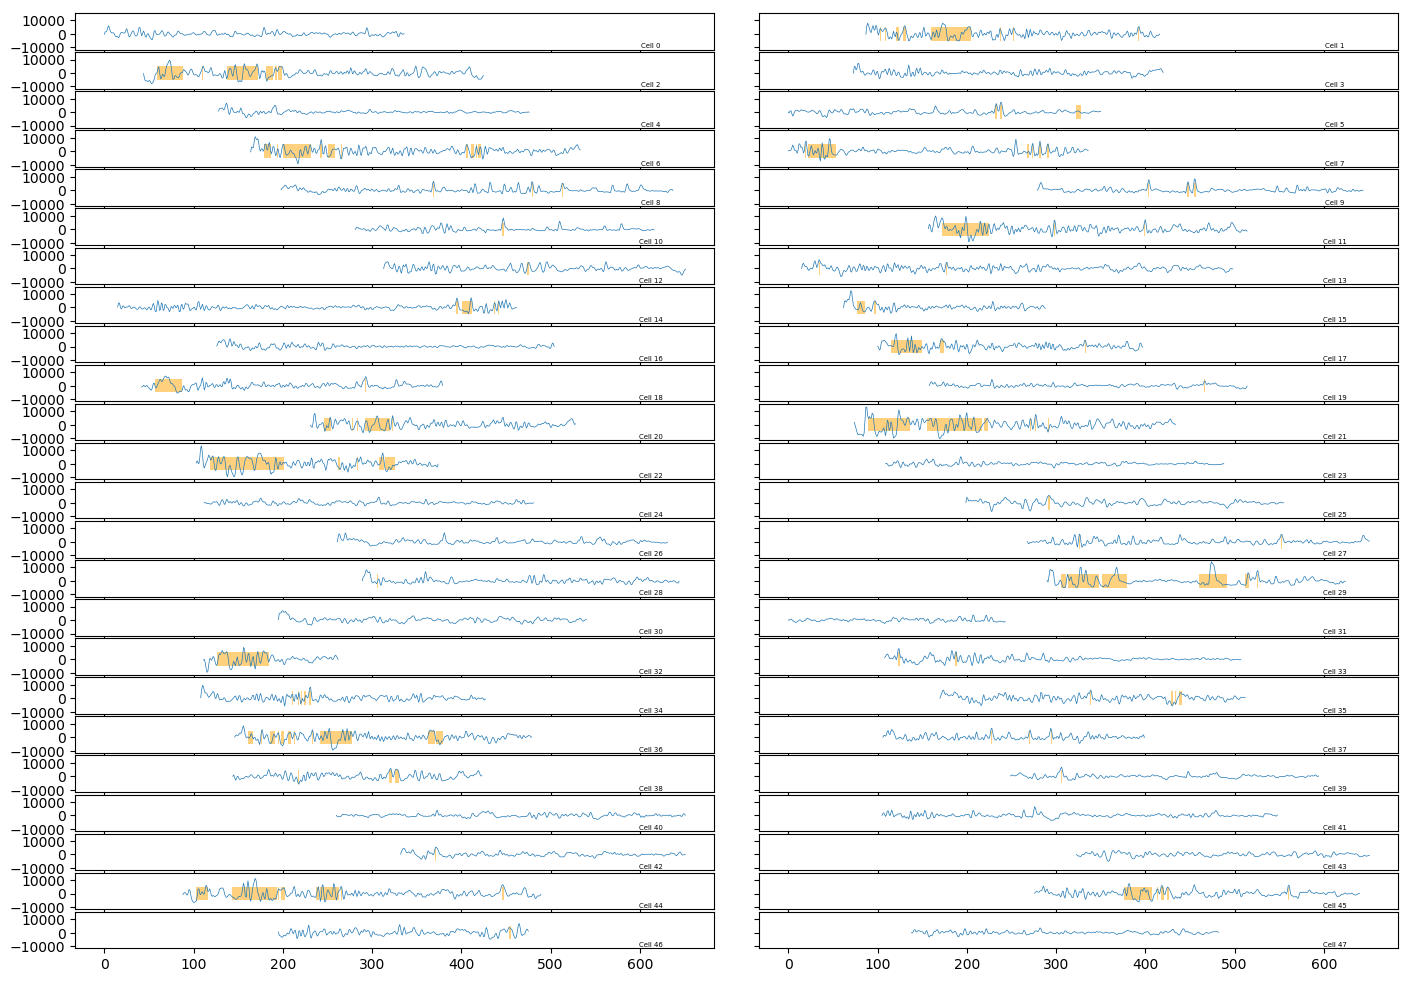

In [621]:
plt.rcdefaults()
df = prueba
cells = df.index.get_level_values(0).unique()
cols = 2
Tot = np.sum(len(cells));Cols = cols;Rows = Tot // Cols;
if Tot % Cols != 0:Rows = Rows + 1
fig, axs = plt.subplots(Rows, Cols, sharex=True, sharey=True, figsize=(8.27*2, 11.69))
axs = axs.ravel()


for z,cell in enumerate(cells):
    ax = axs[z];
    ax.grid(False);

    if cells[-1] >= cell:
        ax.plot(df.loc[cells[cell]]['MEAN_INTENSITY_BP'], linewidth=0.5)
        ax.fill_between(df.loc[cells[cell]].index, 5000,-5000, where=df.loc[cells[cell]]['pred']==-1, facecolor='orange', alpha=0.5)
        ax.text(0.9, 0.1, 'Cell ' + str(cell), ha='center', va='center', transform=ax.transAxes, fontsize=5)

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.07, hspace=0.07)
plt.show()

## Modelos 2: Isolation Forest 

In [90]:
from sklearn.ensemble import IsolationForest


In [205]:
clf_IF = IsolationForest(behaviour='new', max_samples=100,random_state=0, contamination='auto')
clf_IF.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)


ValueError: X.shape[1] = 14 should be equal to 12, the number of features at training time

In [94]:
preds = y_pred_test
targs = y_test

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
#print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

accuracy:  0.7498910675381264
precision:  1.0
recall:  0.7498910675381264
f1:  0.8570717131474104
